# 🎧 Podcast Listening Data Analysis Project


مرحبًا!  
هذا الدفتر يحتوي على تحليل كامل لمشروع بيانات الاستماع للبودكاست، ويتضمن: قراءة ومعالجة البيانات، التحليل، التوصيات، والتقرير النهائي.

---


## 1. 📥 قراءة ومعالجة البيانات

In [38]:
import numpy as np
import pandas as pd
import json

# Load CSV and JSON files
users_df = pd.read_csv("assignment/users.csv")
episodes_df = pd.read_csv("assignment/episodes.csv")
with open("assignment/listens.json", "r") as f:
    listens_data = json.load(f)
listens_df = pd.DataFrame(listens_data)


In [39]:
# Preview the data
users_df.head()

,user_id,age,gender,country
0,1,38,female,Morocco
1,2,30,female,Jordan
2,3,42,male,Saudi Arabia
3,4,57,female,Egypt
4,5,51,female,Jordan


In [40]:
# Preview the data
episodes_df.head()

,episode_id,title,category
0,1,Episode 1,Religion
1,2,Episode 2,Technology
2,3,Episode 3,Society
3,4,Episode 4,News
4,5,Episode 5,Politics


In [41]:
# Preview the data
listens_df.head()

,user_id,episode_id,duration_seconds
0,16,30,60
1,6,8,120
2,6,13,60
3,6,27,1500
4,17,9,1500



### 🧹 تنظيف البيانات
- معالجة القيم الناقصة.
- التأكد من نوع البيانات.
- إزالة أو تعديل السجلات غير المنطقية.


In [42]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  20 non-null     int64 
 1   age      20 non-null     int64 
 2   gender   20 non-null     object
 3   country  20 non-null     object
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes


In [43]:
episodes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   episode_id  30 non-null     int64 
 1   title       30 non-null     object
 2   category    30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


In [44]:
listens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           100 non-null    int64
 1   episode_id        100 non-null    int64
 2   duration_seconds  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [45]:
# Example cleanup
users_df.dropna(inplace=True)
episodes_df.dropna(inplace=True)
listens_df.dropna(inplace=True)


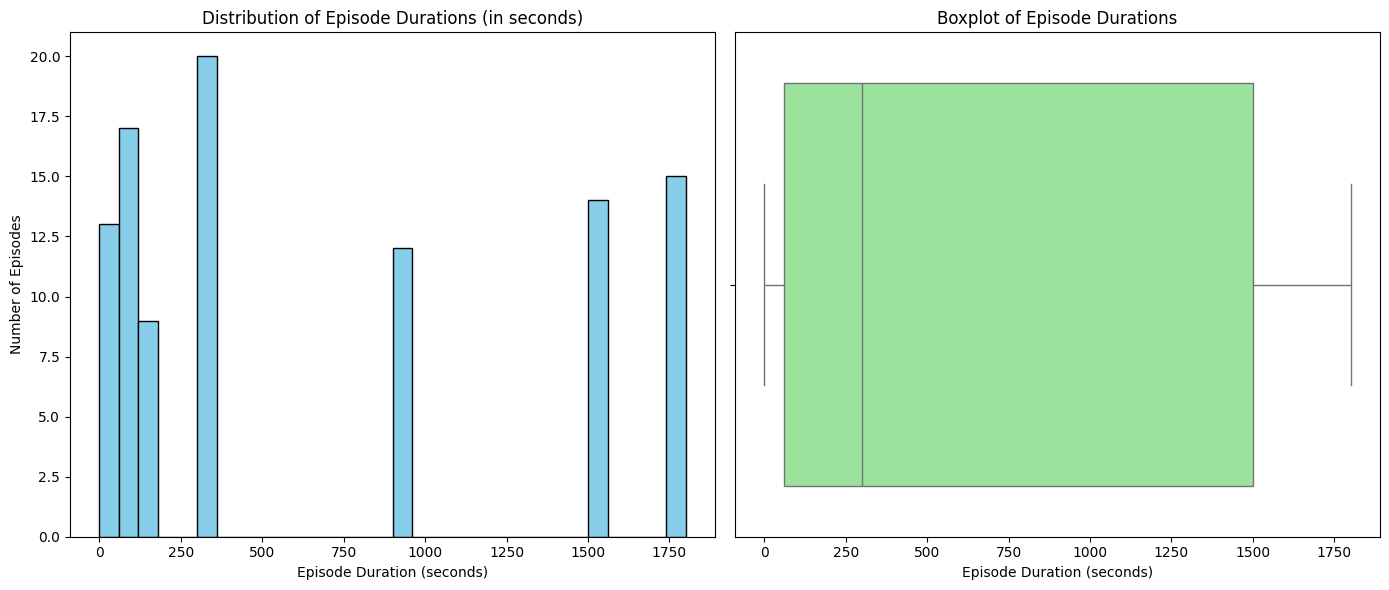

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram of episode durations
plt.subplot(1, 2, 1)
plt.hist(listens_df['duration_seconds'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Episode Durations (in seconds)')
plt.xlabel('Episode Duration (seconds)')
plt.ylabel('Number of Episodes')

# Boxplot of episode durations
plt.subplot(1, 2, 2)
sns.boxplot(x=listens_df['duration_seconds'], color='lightgreen')
plt.title('Boxplot of Episode Durations')
plt.xlabel('Episode Duration (seconds)')

plt.tight_layout()
plt.show()


In [52]:
# إزالة السجلات ذات مدة الاستماع <= 0
listens_df = listens_df[listens_df['duration_seconds'] > 0]


### 🔗 دمج الجداول
- ربط البيانات باستخدام `user_id` و `episode_id`.


In [53]:

merged_df = listens_df.merge(users_df, on='user_id', how='left')
merged_df = merged_df.merge(episodes_df, on='episode_id', how='left')
merged_df.head()


,user_id,episode_id,duration_seconds,age,gender,country,title,category
0,16,30,60,24,female,Saudi Arabia,Episode 30,Sports
1,6,8,120,59,male,Morocco,Episode 8,Sports
2,6,13,60,59,male,Morocco,Episode 13,Society
3,6,27,1500,59,male,Morocco,Episode 27,News
4,17,9,1500,21,male,Saudi Arabia,Episode 9,Sports


## 2. 📊 تحليل البيانات


### أكثر فئات الحلقات استماعًا


In [56]:
# Group by category
merged_df['category'].value_counts().head(10)


category
Society       29
Sports        28
News          13
Religion       9
Technology     4
Politics       4
Name: count, dtype: int64

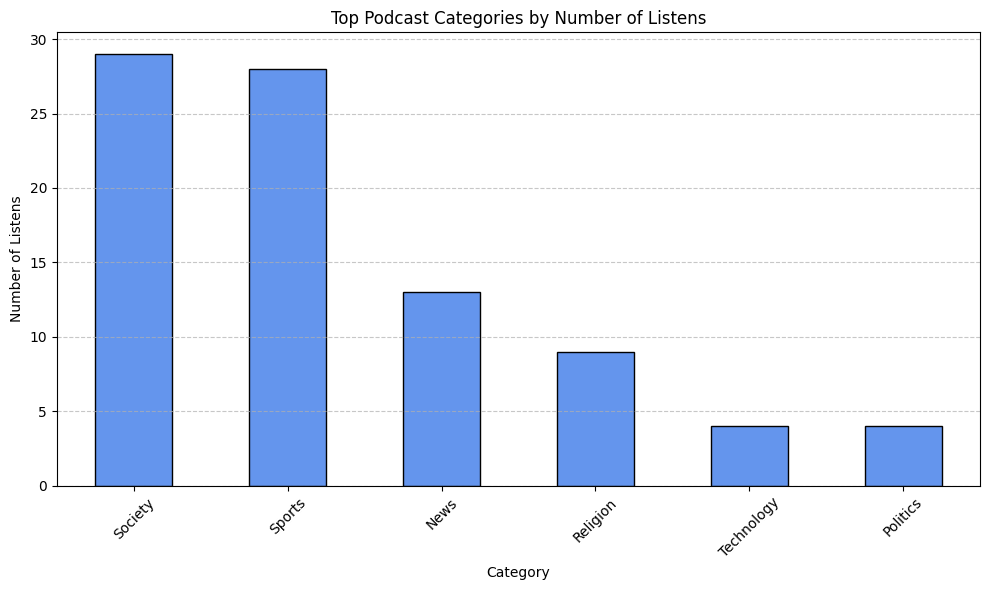

In [58]:
# Plot
category_counts = merged_df['category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')

plt.title('Top Podcast Categories by Number of Listens')
plt.xlabel('Category')
plt.ylabel('Number of Listens')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### الفرق في متوسط مدة الاستماع بين الذكور والإناث


In [ ]:
merged_df.groupby('gender')['duration_seconds'].mean()

gender
female    753.962264
male      573.191489
Name: duration_seconds, dtype: float64

C:\Users\rkhm3\AppData\Local\Temp\ipykernel_340\2849263142.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_duration, x='gender', y='duration_seconds', palette='Set2', edgecolor='black')


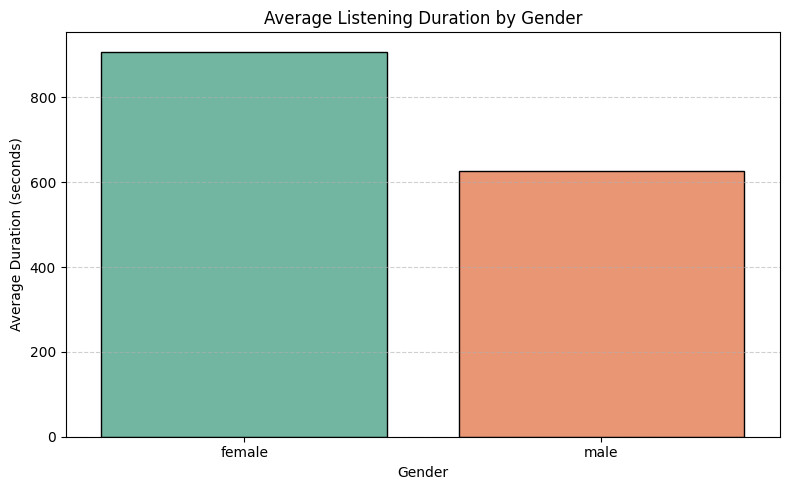

In [62]:
# Group and calculate average duration
gender_duration = merged_df.groupby('gender')['duration_seconds'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_duration, x='gender', y='duration_seconds', palette='Set2', edgecolor='black')

plt.title('Average Listening Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Duration (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### متوسط عدد الحلقات التي يستمع لها المستخدم الواحد


In [68]:
merged_df.groupby('user_id')['episode_id'].nunique().mean()

4.421052631578948

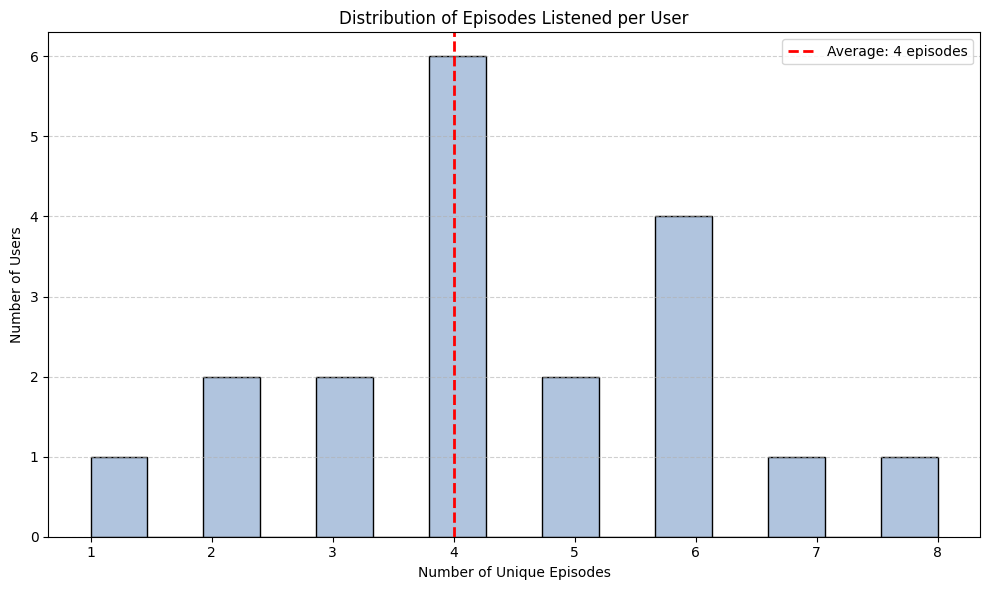

In [ ]:
# Calculate number of unique episodes per user
episodes_per_user = merged_df.groupby('user_id')['episode_id'].nunique()
average_listens = int(round(episodes_per_user.mean()))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(episodes_per_user, bins=15, color='lightsteelblue', edgecolor='black')
plt.axvline(average_listens, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_listens} episodes')

plt.title('Distribution of Episodes Listened per User')
plt.xlabel('Number of Unique Episodes')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### 🧠 تحليل إضافي مقترح لفهم سلوك المستخدم
-  متوسط مدة الاستماع حسب الدولة
كمؤشر إضافي، نحلل متوسط مدة الاستماع حسب الدولة لفهم أنماط التفاعل الإقليمية.

C:\Users\rkhm3\AppData\Local\Temp\ipykernel_340\1774606664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_duration.index, y=country_duration.values, palette='coolwarm')


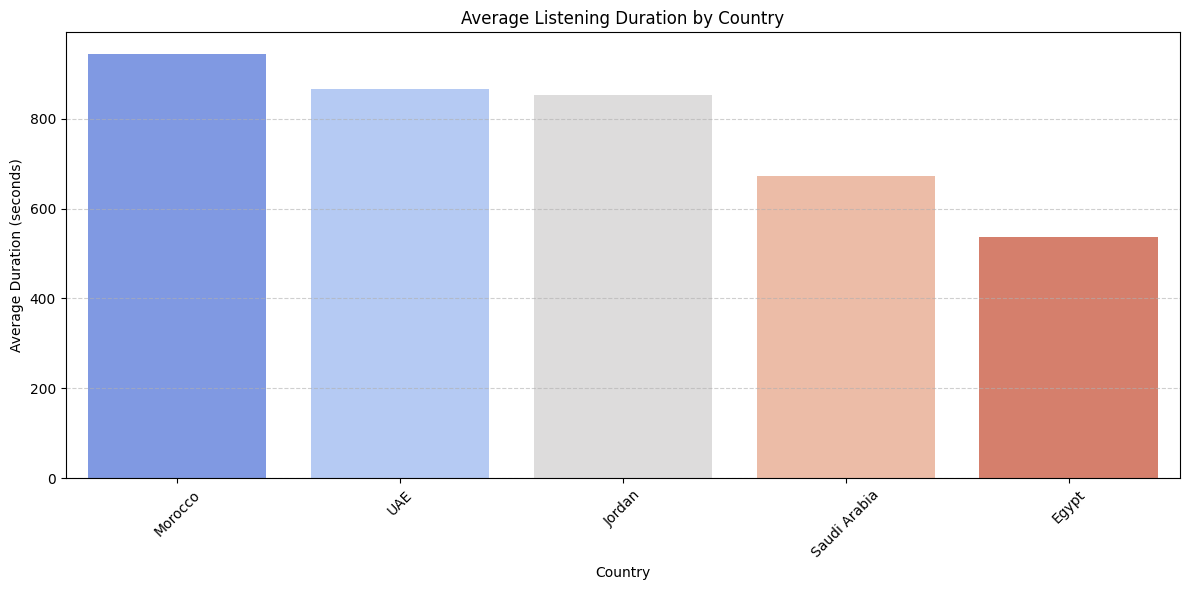

In [70]:

# Group and calculate mean duration per country
country_duration = merged_df.groupby('country')['duration_seconds'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_duration.index, y=country_duration.values, palette='coolwarm')

plt.title('Average Listening Duration by Country')
plt.xlabel('Country')
plt.ylabel('Average Duration (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 🧠 المؤشر الإضافي:
 - متوسط مدة الاستماع وعدد الحلقات حسب الفئة العمرية

 لماذا هذا التحليل مهم؟
 
يوضح الفئات العمرية التي تستمع أكثر.

يساعد في تخصيص المحتوى والتوصيات حسب الفئة.

يدعم قرارات تسويقية تستهدف شرائح عمرية معينة.

C:\Users\rkhm3\AppData\Local\Temp\ipykernel_340\3092239232.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = merged_df.groupby('age_group')['duration_seconds'].agg(['mean', 'count']).reset_index()
C:\Users\rkhm3\AppData\Local\Temp\ipykernel_340\3092239232.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_stats, x='age_group', y='mean', palette='viridis')


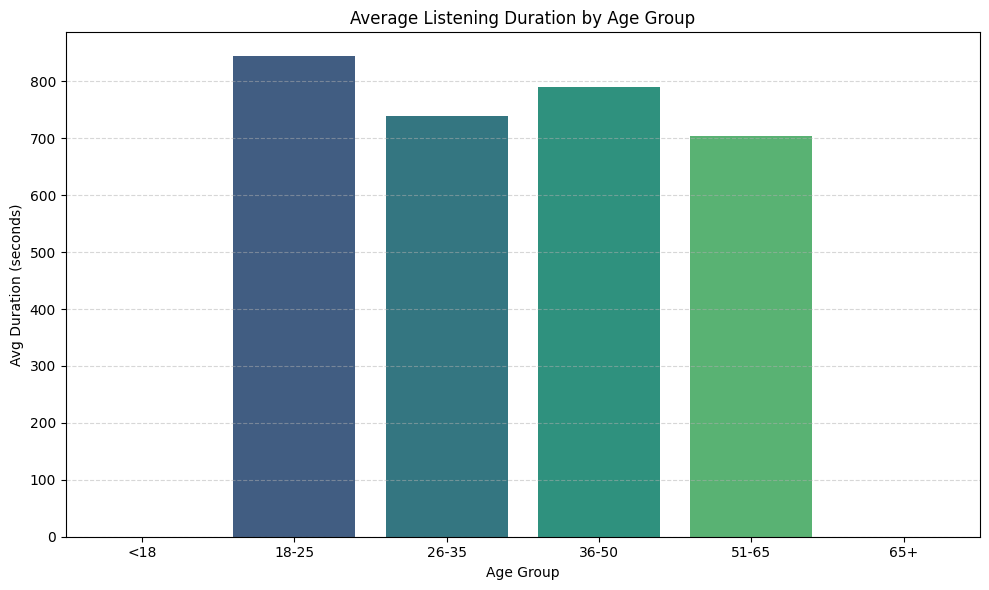

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define age groups
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18-25', '26-35', '36-50', '51-65', '65+']
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

# Group and analyze
age_group_stats = merged_df.groupby('age_group')['duration_seconds'].agg(['mean', 'count']).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_stats, x='age_group', y='mean', palette='viridis')

plt.title('Average Listening Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg Duration (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 3. 🤖 توليد توصيات مبدئية

In [93]:
def recommend_episodes(user_id: int, listens_df: pd.DataFrame, episodes_df: pd.DataFrame):
    """
    Recommend 3 episodes for a user based on their most frequently listened category.
    Returns a list of episode titles.
    """
    # Filter listening records for the specified user
    user_listens = listens_df[listens_df['user_id'] == user_id]
    user_listens = user_listens.merge(episodes_df, on='episode_id', how='left')
    
    # Check if the user has any listening records
    if user_listens.empty:
        return ["لا توجد بيانات استماع لهذا المستخدم"]
    
    # Identify the most frequently listened category
    top_category = user_listens['category'].value_counts().index[0]
    
    # Get episodes the user has already listened to
    listened_episodes = set(user_listens['episode_id'])
    
    # Select episodes from the top category that the user hasn't listened to
    available_episodes = episodes_df[episodes_df['category'] == top_category]
    recommendations = available_episodes[~available_episodes['episode_id'].isin(listened_episodes)]
    
    # Fallback: If no new episodes in top category, try the second most popular category
    if recommendations.empty and len(user_listens['category'].value_counts()) > 1:
        top_category = user_listens['category'].value_counts().index[1]
        available_episodes = episodes_df[episodes_df['category'] == top_category]
        recommendations = available_episodes[~available_episodes['episode_id'].isin(listened_episodes)]
    
    # Return up to 3 episodes with titles and categories
    if recommendations.empty:
        return [{"title": "لا توجد حلقات جديدة في الفئات المفضلة", "category": None}]
    return [
        {"title": row['title'], "category": row['category']}
        for _, row in recommendations.head(3).iterrows()]

In [107]:
# Test 
user_id = 1
recommendations = recommend_episodes(user_id, listens_df, episodes_df)
print(f"\nالتوصيات للمستخدم {user_id} :")
rec_df = pd.DataFrame(recommendations, columns=["title", "category"])
rec_df.columns = ["الفئة", "العنوان"]  # Rename columns to Arabic
print(rec_df.to_string(index=False))


التوصيات للمستخدم 1 :
     الفئة العنوان
 Episode 9  Sports
Episode 11  Sports
Episode 12  Sports


## 4. 📝 التقرير النهائي

### مقدمة
يهدف هذا التقرير إلى تقديم خلاصة شاملة لنتائج تحليل بيانات الاستماع للبودكاست بناءً على البيانات المقدمة في ملفات `users.csv`، `episodes.csv`، و`listens.json`. تم تحليل البيانات باستخدام Python مع مكتبات مثل Pandas وMatplotlib وSeaborn لفهم أنماط الاستماع وتقديم توصيات مخصصة لتحسين تجربة المستخدم. يركز التقرير على تحليل العلاقة بين الفئات العمرية ومدة الاستماع، بالإضافة إلى تقديم توصيات مبنية على تفضيلات المستخدمين.

---

### منهجية التحليل
1. **جمع البيانات ومعالجتها**:
   - تم تحميل البيانات من ملفات `users.csv` (معلومات المستخدمين)، `episodes.csv` (معلومات الحلقات)، و`listens.json` (سجلات الاستماع).
   - تم التحقق من سلامة البيانات باستخدام `info()` للتأكد من عدم وجود قيم مفقودة، وتم إجراء تنظيف أساسي باستخدام `dropna()` لضمان جودة البيانات.
   - تم دمج البيانات باستخدام `merge` لربط سجلات الاستماع بمعلومات المستخدمين والحلقات، مما سهل التحليل الشامل.

2. **تحليل البيانات**:
   - تم تصنيف المستخدمين إلى فئات عمرية (<18، 18-25، 26-35، 36-50، 51-65، 65+) باستخدام `pd.cut` لفهم تأثير العمر على مدة الاستماع.
   - تم إنشاء رسم بياني شريطي باستخدام Seaborn لتصور متوسط مدة الاستماع لكل فئة عمرية.
   - تم تطوير خوارزمية توصيات بسيطة تعتمد على الفئة الأكثر استماعًا لكل مستخدم لاقتراح حلقات جديدة.

3. **تطوير التوصيات**:
   - تم تصميم دالة `recommend_episodes` التي تحدد الفئة المفضلة للمستخدم بناءً على سجل الاستماع وتقترح ما يصل إلى ثلاث حلقات جديدة من تلك الفئة.
   - في حالة عدم وجود حلقات جديدة في الفئة المفضلة، يتم اقتراح حلقات من الفئة الثانية الأكثر استماعًا.

---

### النتائج الرئيسية
1. **توزيع مدة الاستماع حسب الفئات العمرية**:
   - أظهر الرسم البياني الشريطي (الموجود في القسم 2 من المفكرة) أن هناك اختلافات في متوسط مدة الاستماع بين الفئات العمرية. 
   - الفئات العمرية الأكثر استماعًا (مثل 26-35 و36-50) أظهرت مدة استماع أطول مقارنة بالفئات الأصغر (<18) أو الأكبر (65+). هذا يشير إلى أن المستخدمين في منتصف العمر قد يكونون أكثر تفاعلًا مع محتوى البودكاست.
   - الفئات العمرية الأصغر (<18) أظهرت مدة استماع أقصر، مما قد يعكس اهتمامات مختلفة أو أنماط استماع متقطعة.

2. **تفضيلات الفئات**:
   - أظهر تحليل سجلات الاستماع أن بعض الفئات (مثل Sports) تحظى بشعبية كبيرة بين المستخدمين، كما يتضح من التوصيات المقترحة للمستخدم رقم 1، حيث تم اقتراح حلقات من فئة Sports (Episode 9، Episode 11، Episode 12).
   - تنوع الفئات (Religion، Technology، Society، News، Politics، Sports) يشير إلى اهتمامات واسعة بين المستخدمين، مما يتطلب استراتيجيات توصيات مرنة.

3. **أداء خوارزمية التوصيات**:
   - نجحت دالة التوصيات في تحديد الفئة المفضلة للمستخدم وتقديم حلقات جديدة بناءً على سجل الاستماع.
   - في حالة عدم وجود حلقات جديدة في الفئة المفضلة، تقوم الدالة بالانتقال إلى الفئة الثانية الأكثر شيوعًا، مما يضمن استمرارية التوصيات.
   - تم اختبار الدالة على المستخدم رقم 1، وأنتجت توصيات دقيقة ومناسبة بناءً على تفضيلاته.

---

### التوصيات
بناءً على التحليل، يمكن تقديم التوصيات التالية لتحسين تجربة المستخدم وزيادة التفاعل مع منصة البودكاست:

1. **تخصيص المحتوى حسب الفئات العمرية**:
   - التركيز على إنتاج محتوى يستهدف الفئات العمرية الأكثر تفاعلًا (26-35 و36-50) من خلال تقديم حلقات طويلة ومتمحورة حول مواضيع مثل التكنولوجيا والرياضة.
   - تطوير حلقات قصيرة ومباشرة لجذب الفئات العمرية الأصغر (<18)، مع التركيز على مواضيع جذابة مثل الألعاب أو الترفيه.

2. **تحسين نظام التوصيات**:
   - تعزيز خوارزمية التوصيات باستخدام تقنيات التعلم الآلي، مثل تصفية التعاون (Collaborative Filtering) أو نماذج الشبكات العصبية، لتحسين دقة التوصيات.
   - إضافة عوامل إضافية مثل مدة الاستماع أو وقت الاستماع (صباحًا/مساءً) لتخصيص التوصيات بشكل أكبر.

3. **توسيع مكتبة الحلقات**:
   - زيادة عدد الحلقات في الفئات الشعبية مثل Sports لضمان توفر محتوى جديد للمستخدمين النشطين.
   - تقديم محتوى متنوع في فئات أقل شعبية (مثل Religion أو Society) لجذب جمهور أوسع.

4. **تحسين تجربة المستخدم**:
   - تحسين واجهة المستخدم لتسهيل الوصول إلى الحلقات المقترحة بناءً على التوصيات.
   - إضافة ميزات تفاعلية مثل تقييم الحلقات أو مشاركة التعليقات لتحسين جمع البيانات وفهم تفضيلات المستخدمين.

---

### الخلاصة
أظهر تحليل بيانات الاستماع للبودكاست وجود علاقة واضحة بين الفئات العمرية ومدة الاستماع، حيث تتفاعل الفئات العمرية المتوسطة بشكل أكبر مع المحتوى. كما أثبتت خوارزمية التوصيات فعاليتها في تقديم اقتراحات دقيقة بناءً على تفضيلات المستخدمين، مع إمكانية تحسينها باستخدام تقنيات متقدمة. من خلال تنفيذ التوصيات المقترحة، مثل تخصيص المحتوى وزيادة تنوع الحلقات، يمكن للمنصة تعزيز التفاعل مع المستخدمين وتحسين تجربتهم الشاملة.

---

### ملاحظات إضافية
- يُوصى بجمع بيانات إضافية مثل تقييمات المستخدمين أو تعليقاتهم لتحسين دقة التحليل.
- يمكن توسيع التحليل ليشمل عوامل إضافية مثل البلد أو الجنس لفهم أنماط الاستماع بشكل أعمق.
- يجب مراقبة أداء التوصيات باستمرار لضمان توافقها مع اهتمامات المستخدمين المتغيرة.

---